## 1. 아파트 매매가격 파일 

국토교통부 실거래가 공시 시스템에서 강남구 아파트 매매가격(16.11.30 - 17.11.30) csv파일 추출

http://rtdown.molit.go.kr/rtms/rqs/rtTrList.do

## 2. 데이터 점검 및 준비

In [1]:
import pandas as pd
import re               #perl에서 쓰는 reg. exp 제공
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')      #R의 ggplot library와 비슷한 형태로 설정 -> ggplot 라이브러리는 뭐가 좋은걸까
%matplotlib inline

In [3]:
pd.set_option("display.max_columns",30)
pd.set_option("display.max_colwidth",100)
pd.set_option("display.precision",3)

csv 불러올 때 encoding 고려할 것

In [7]:
df = pd.read_csv("Gangnam_APT_161130_171130.csv",encoding="euc-kr")

In [19]:
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201612,21~31,"80,000",5,1988,언주로
1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201703,11~20,"80,000",7,1988,언주로
2,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201704,11~20,"85,000",2,1988,언주로
3,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201707,1~10,"89,900",1,1988,언주로
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201612,21~31,"89,000",5,1987,언주로
5,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201704,11~20,"97,500",4,1987,언주로
6,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201704,11~20,"98,000",1,1987,언주로
7,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201705,11~20,"98,000",1,1987,언주로
8,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201705,21~31,"79,000",1,1987,언주로
9,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,54.98,201705,21~31,"82,000",3,1987,언주로


In [23]:
df.ix[:,[x for x in df.columns if "계약" in x]]

,계약년월,계약일
0,201612,21~31
1,201703,11~20
2,201704,11~20
3,201707,1~10
4,201612,21~31
5,201704,11~20
6,201704,11~20
7,201705,11~20
8,201705,21~31
9,201705,21~31


In [24]:
df.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명'],
      dtype='object')

column명 영어로 변환

In [61]:
df.columns = ['dong','bun','bon','bu','dan','area(m2)','contract_month','contract_day','price(10,000won)','floor','built_year','street']

In [63]:
df.head()

,dong,bun,bon,bu,dan,area(m2),contract_month,contract_day,"price(10,000won)",floor,built_year,street
0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201612,21~31,"80,000",5,1988,언주로
1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201703,11~20,"80,000",7,1988,언주로
2,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201704,11~20,"85,000",2,1988,언주로
3,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,201707,1~10,"89,900",1,1988,언주로
4,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,201612,21~31,"89,000",5,1987,언주로


dong, dan, street은 한글이므로 변환 필요 <br>
(1) dong: 개포동 -> gaepo <br>
(2) dan: label encoding (숫자 크기 무시) <br>
(3) street: label encoding (숫자 크기 무시)

In [35]:
df['시군구'].unique()

array(['서울특별시 강남구 개포동', '서울특별시 강남구 논현동', '서울특별시 강남구 대치동', '서울특별시 강남구 도곡동',
       '서울특별시 강남구 삼성동', '서울특별시 강남구 세곡동', '서울특별시 강남구 수서동', '서울특별시 강남구 신사동',
       '서울특별시 강남구 압구정동', '서울특별시 강남구 역삼동', '서울특별시 강남구 율현동', '서울특별시 강남구 일원동',
       '서울특별시 강남구 자곡동', '서울특별시 강남구 청담동'], dtype=object)

In [65]:
encoded_df = df
encoded_df['dong'] = df['dong'].map({'서울특별시 강남구 개포동': 'gaepo','서울특별시 강남구 논현동':'nonhyeon','서울특별시 강남구 대치동':'daechi','서울특별시 강남구 도곡동':'dogok','서울특별시 강남구 삼성동':'samsung','서울특별시 강남구 세곡동':'segok','서울특별시 강남구 수서동':'suseo','서울특별시 강남구 신사동':'sinsa','서울특별시 강남구 압구정동':'apgujeong','서울특별시 강남구 역삼동':'yeoksam','서울특별시 강남구 율현동':'yulhyeon','서울특별시 강남구 일원동':'irwon','서울특별시 강남구 자곡동':'jagok','서울특별시 강남구 청담동':'chungdam'})

< map이 아닌 좀 더 효율적으로 하는 방법을 궁리해보자 >

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [66]:
encoded_df

,dong,bun,bon,bu,dan,area(m2),contract_month,contract_day,"price(10,000won)",floor,built_year,street
0,gaepo,655-2,655,2,개포2차현대아파트(220),77.75,201612,21~31,"80,000",5,1988,언주로
1,gaepo,655-2,655,2,개포2차현대아파트(220),77.75,201703,11~20,"80,000",7,1988,언주로
2,gaepo,655-2,655,2,개포2차현대아파트(220),77.75,201704,11~20,"85,000",2,1988,언주로
3,gaepo,655-2,655,2,개포2차현대아파트(220),77.75,201707,1~10,"89,900",1,1988,언주로
4,gaepo,658-1,658,1,개포6차우성아파트1동~8동,79.97,201612,21~31,"89,000",5,1987,언주로
5,gaepo,658-1,658,1,개포6차우성아파트1동~8동,79.97,201704,11~20,"97,500",4,1987,언주로
6,gaepo,658-1,658,1,개포6차우성아파트1동~8동,79.97,201704,11~20,"98,000",1,1987,언주로
7,gaepo,658-1,658,1,개포6차우성아파트1동~8동,79.97,201705,11~20,"98,000",1,1987,언주로
8,gaepo,658-1,658,1,개포6차우성아파트1동~8동,54.98,201705,21~31,"79,000",1,1987,언주로
9,gaepo,658-1,658,1,개포6차우성아파트1동~8동,54.98,201705,21~31,"82,000",3,1987,언주로


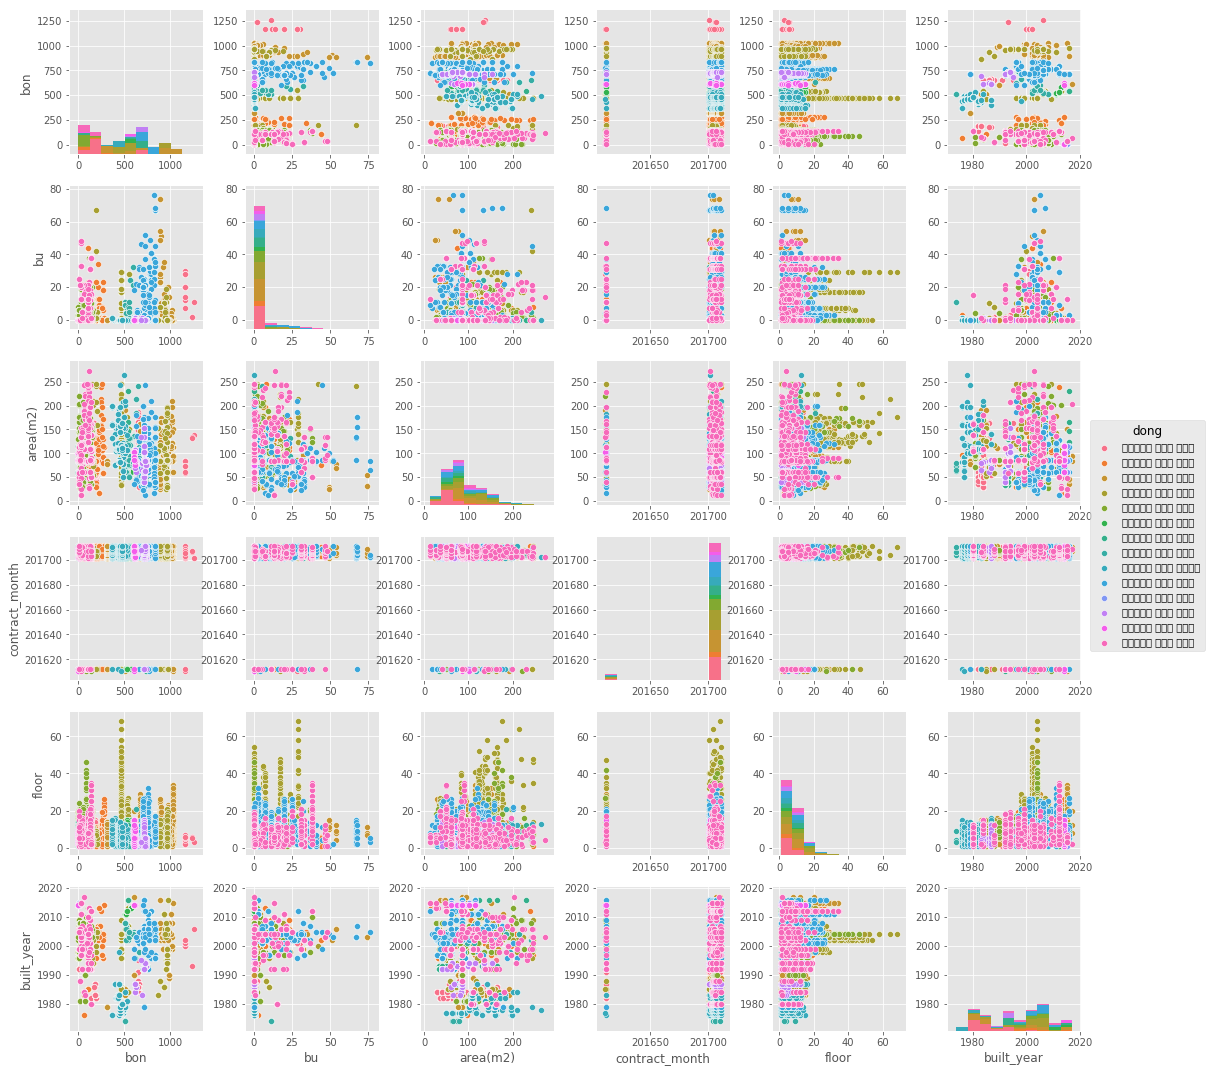

In [64]:
import seaborn as sns
sns.pairplot(df,hue="dong")

x,y축 변경

In [29]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,6561,6562,6563,6564,6565,6566,6567,6568,6569,6570,6571,6572,6573,6574,6575
시군구,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,서울특별시 강남구 개포동,...,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동,서울특별시 강남구 청담동
번지,655-2,655-2,655-2,655-2,658-1,658-1,658-1,658-1,658-1,658-1,658-1,658-1,658-1,658-1,658-1,...,23,43-1,43-1,121,121,106,106,106,5-25,5-25,5-25,5-25,5-25,141-1,141-1
본번,655,655,655,655,658,658,658,658,658,658,658,658,658,658,658,...,23,43,43,121,121,106,106,106,5,5,5,5,5,141,141
부번,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,0,0,0,25,25,25,25,25,1,1
단지명,개포2차현대아파트(220),개포2차현대아파트(220),개포2차현대아파트(220),개포2차현대아파트(220),개포6차우성아파트1동~8동,개포6차우성아파트1동~8동,개포6차우성아파트1동~8동,개포6차우성아파트1동~8동,개포6차우성아파트1동~8동,개포6차우성아파트1동~8동,개포6차우성아파트1동~8동,개포6차우성아파트1동~8동,개포6차우성아파트1동~8동,개포6차우성아파트1동~8동,개포6차우성아파트1동~8동,...,현대2,현대빌라(43-1),현대빌라(43-1),현대빌라트,현대빌라트,현대한강,현대한강,현대한강,휴먼스타빌,휴먼스타빌,휴먼스타빌,휴먼스타빌,휴먼스타빌,흥화빌라,흥화빌라
전용면적(㎡),77.8,77.8,77.8,77.8,80,80,80,80,55,55,55,55,80,55,80,...,84.9,149,145,184,170,136,136,136,40,35.9,35.9,35.9,35.9,207,207
계약년월,201612,201703,201704,201707,201612,201704,201704,201705,201705,201705,201705,201706,201707,201707,201710,...,201709,201704,201710,201706,201708,201701,201703,201707,201612,201705,201706,201709,201711,201703,201707
계약일,21~31,11~20,11~20,1~10,21~31,11~20,11~20,11~20,21~31,21~31,21~31,1~10,21~31,21~31,11~20,...,21~30,11~20,11~20,1~10,1~10,1~10,11~20,1~10,21~31,21~31,11~20,1~10,21~30,1~10,21~31
거래금액(만원),"80,000","80,000","85,000","89,900","89,000","97,500","98,000","98,000","79,000","82,000","78,000","85,000","117,500","90,000","117,000",...,"104,000","120,000","137,000","178,500","179,000","140,000","138,000","170,000","50,000","51,500","48,000","51,500","50,800","205,000","202,500"
층,5,7,2,1,5,4,1,1,1,3,4,4,3,1,2,...,7,5,5,4,8,4,3,8,9,20,5,17,11,3,2


## 문제가 있는 데이터를 찾아내기(NaN, 주소 부분에 날짜가 들어가있는 경우 등)

In [32]:
len(df)

6576

In [33]:
good = df[df['시군구'].str.contains('서울')]

In [34]:
len(good)

6576

df의 길이와 good의 길이가 같으므로 '시군구'column에 이상한 data는 없다.

### column안의 중복 제외 클래스 리스트 확인!!! (자주 쓰일듯)

동별로 나눠보기

In [37]:
gaepo = df[df['시군구'].str.contains('개포동')]
nonhyun = df[df['시군구'].str.contains('논현동')]
daechi = df[df['시군구'].str.contains('대치동')]
dogok = df[df['시군구'].str.contains('도곡동')]
samsung = df[df['시군구'].str.contains('삼성동')]
segok = df[df['시군구'].str.contains('세곡동')]
suseo = df[df['시군구'].str.contains('수서동')]
sinsa = df[df['시군구'].str.contains('신사동')]
apgujeong = df[df['시군구'].str.contains('압구정동')]
yeoksam =df[df['시군구'].str.contains('역삼동')]
yulhyeon = df[df['시군구'].str.contains('율현동')]
irwon = df[df['시군구'].str.contains('일원동')]
jagok = df[df['시군구'].str.contains('자곡동')]
chungdam = df[df['시군구'].str.contains('청담동')]

In [52]:
if len(df) == (len(gaepo)+len(nonhyun)+len(daechi)+len(dogok)+len(samsung)+len(segok)+len(suseo)+len(sinsa)+len(apgujeong)+len(yeoksam)+len(yulhyeon)+len(irwon)+len(jagok)+len(chungdam)):
    print('시군구 분류 완료!')
else:
    print('빠진 녀석이 있다')

시군구 분류 완료!


In [53]:
df.columns.unique()

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명'],
      dtype='object')

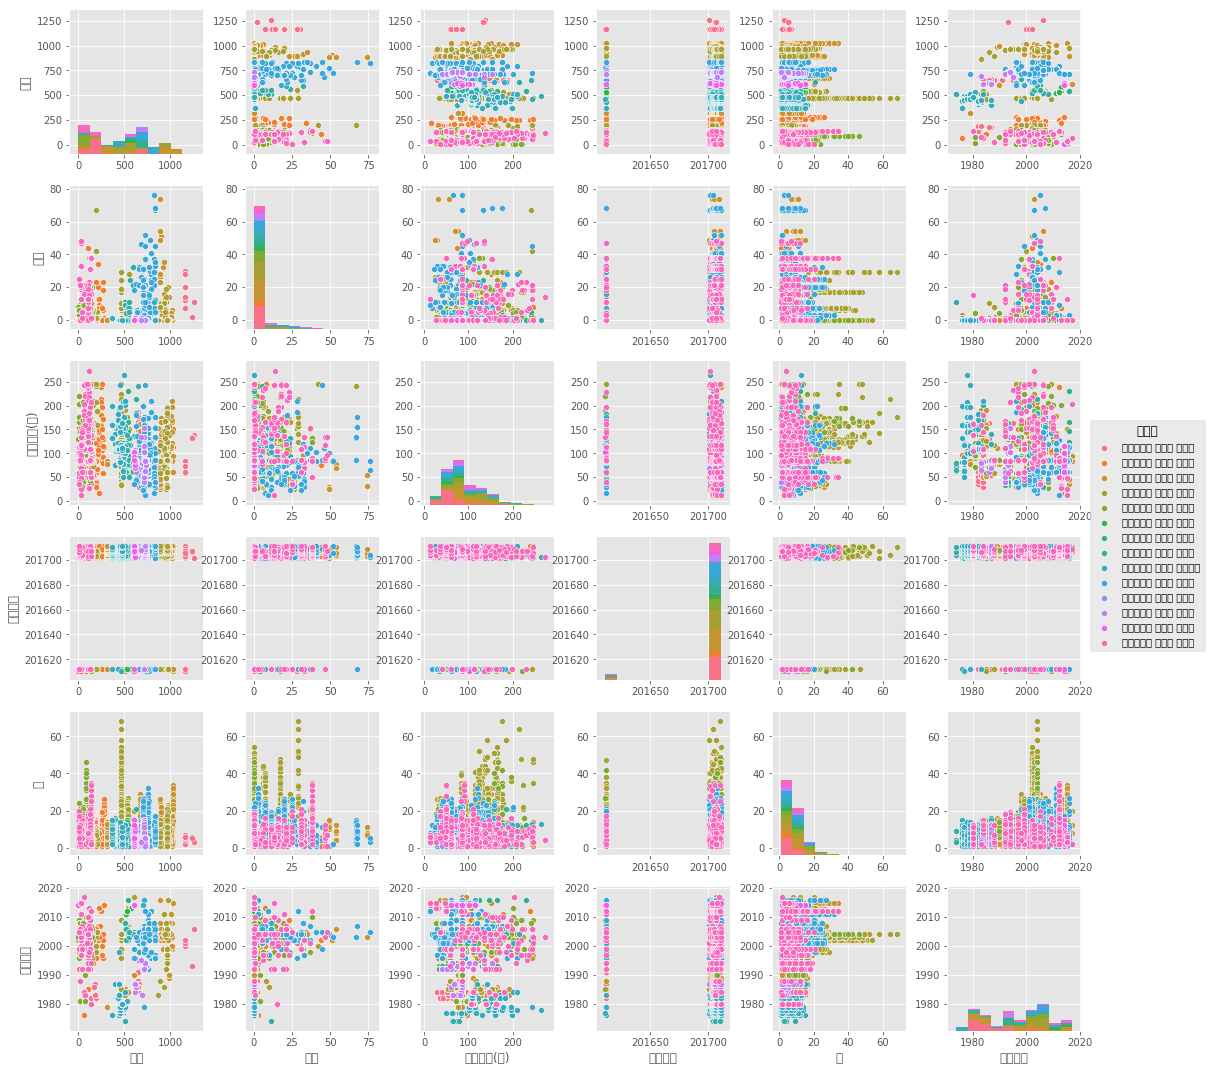